In [4]:
from  torch import nn
import torch

# 全连接层
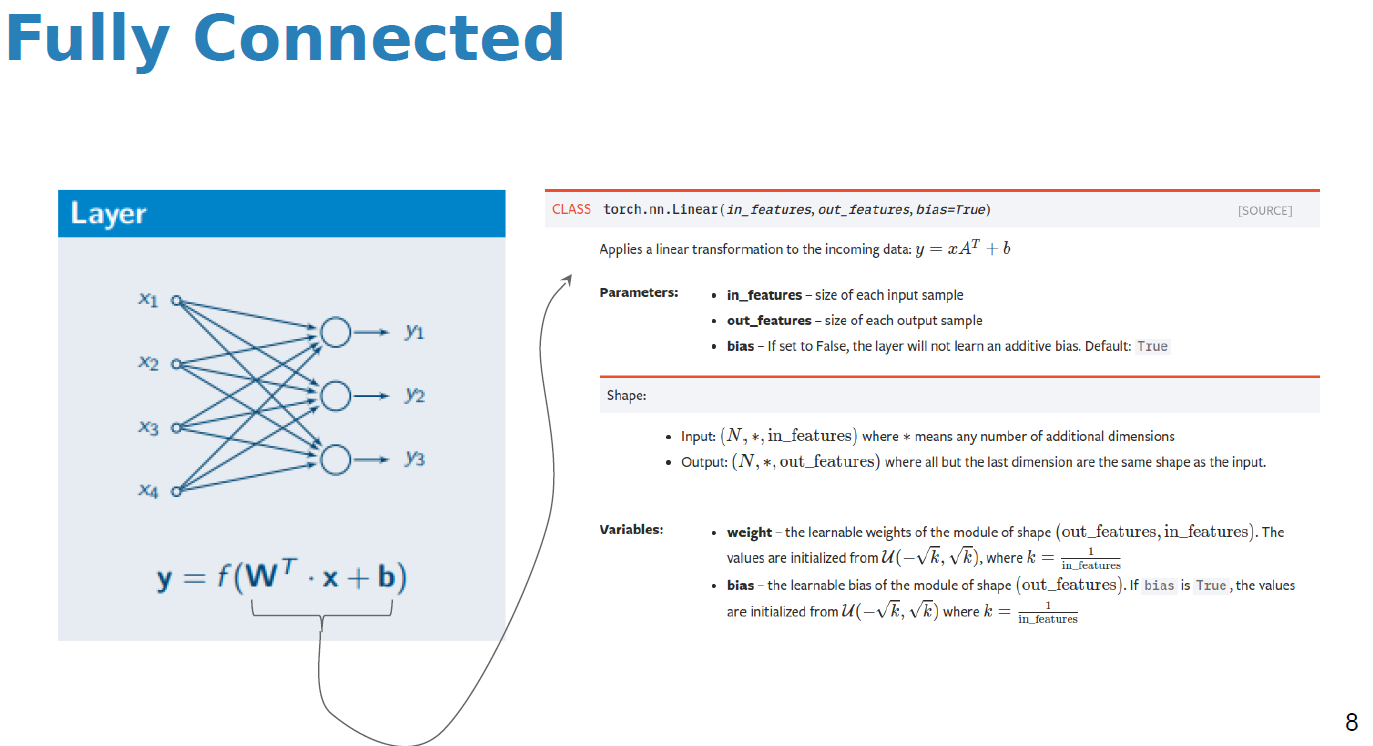

param解析

in_features：每个输入样本的size

out_features：每个输出样本的size

bais：是否加入bais

# 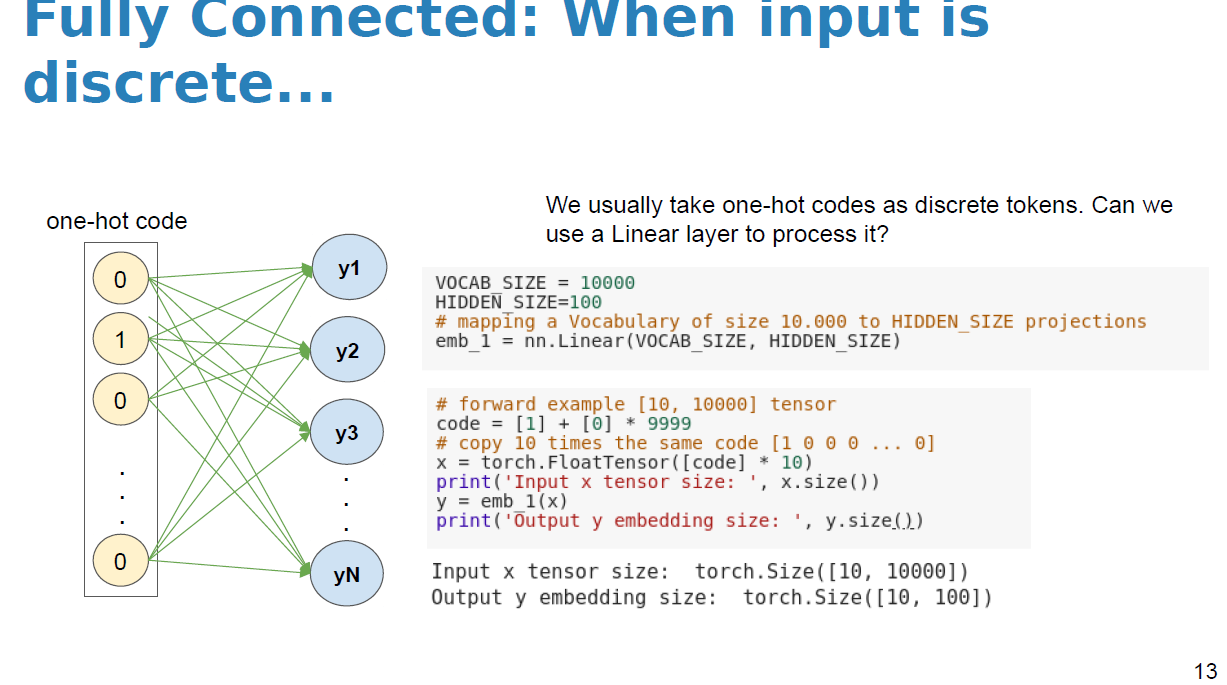

In [5]:
vocab_size=10000
hidden_size=100
emb_1 = nn.Linear(vocab_size,hidden_size)

##### emb_1的size为[10000,100],输入样本类型为[n,10000]

In [8]:
code =[1]+[0]*9999
x = torch.FloatTensor([code]*10)
print(x.size())
y = emb_1(x)
print(y.size())

torch.Size([10, 10000])
torch.Size([10, 100])


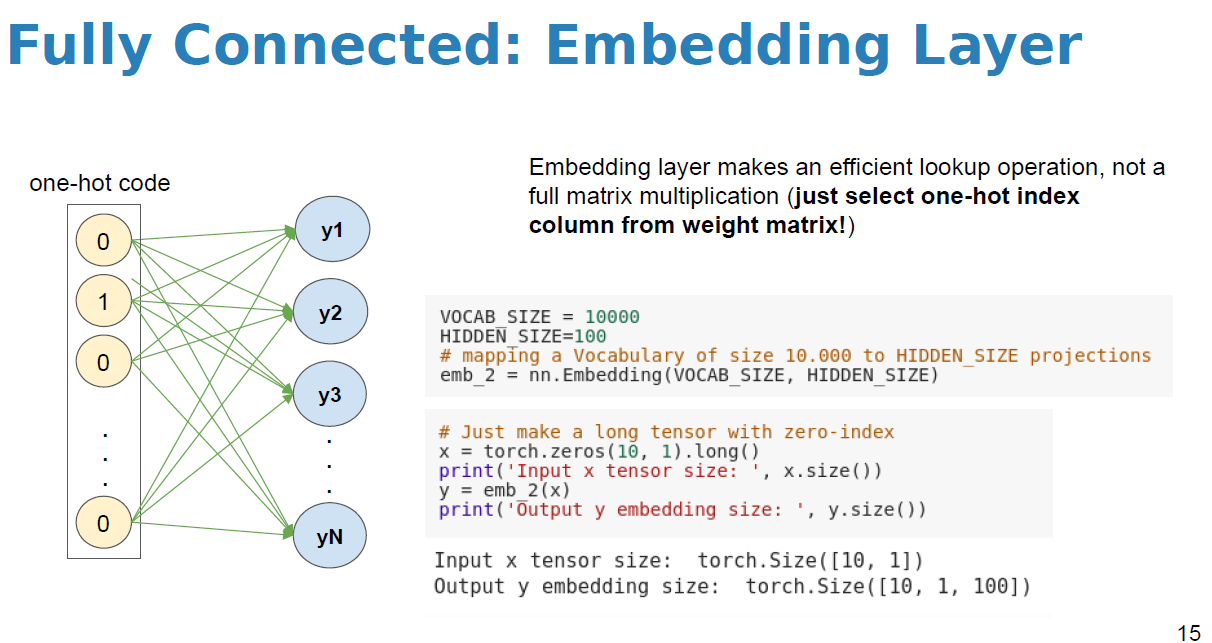

In [14]:
emb_2 = nn.Embedding(vocab_size,hidden_size)
x = torch.zeros(10,5).long()
y = emb_2(x)
print(x.size(),y.size())

torch.Size([10, 5]) torch.Size([10, 5, 100])


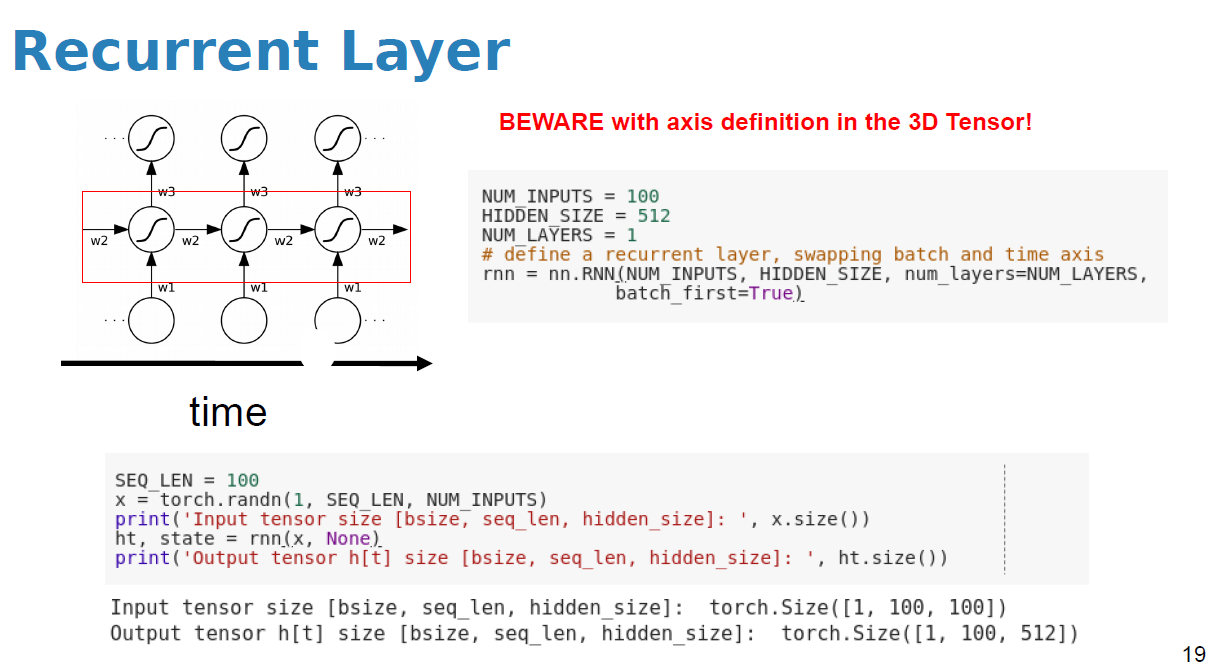

In [26]:
num_inputs = 100
hidden_size=512
num_layers = 1
rnn = nn.RNN(num_inputs,hidden_size,num_layers=num_layers,batch_first=True)
seq_len = 100
x = torch.randn(5,seq_len,num_inputs)
ht,state=rnn(x,None)
# state   size :[1,batch_size,hidden_size]
print(x.size(),ht.size(),state.size())   

torch.Size([5, 100, 100]) torch.Size([5, 100, 512]) torch.Size([1, 5, 512])


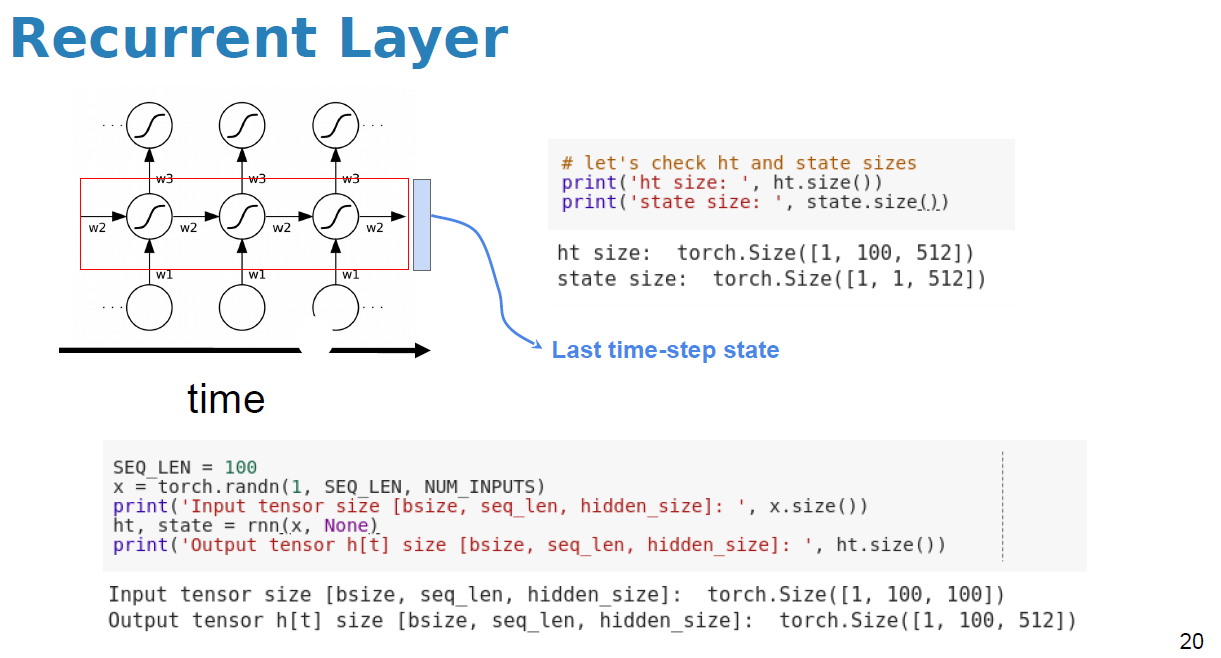

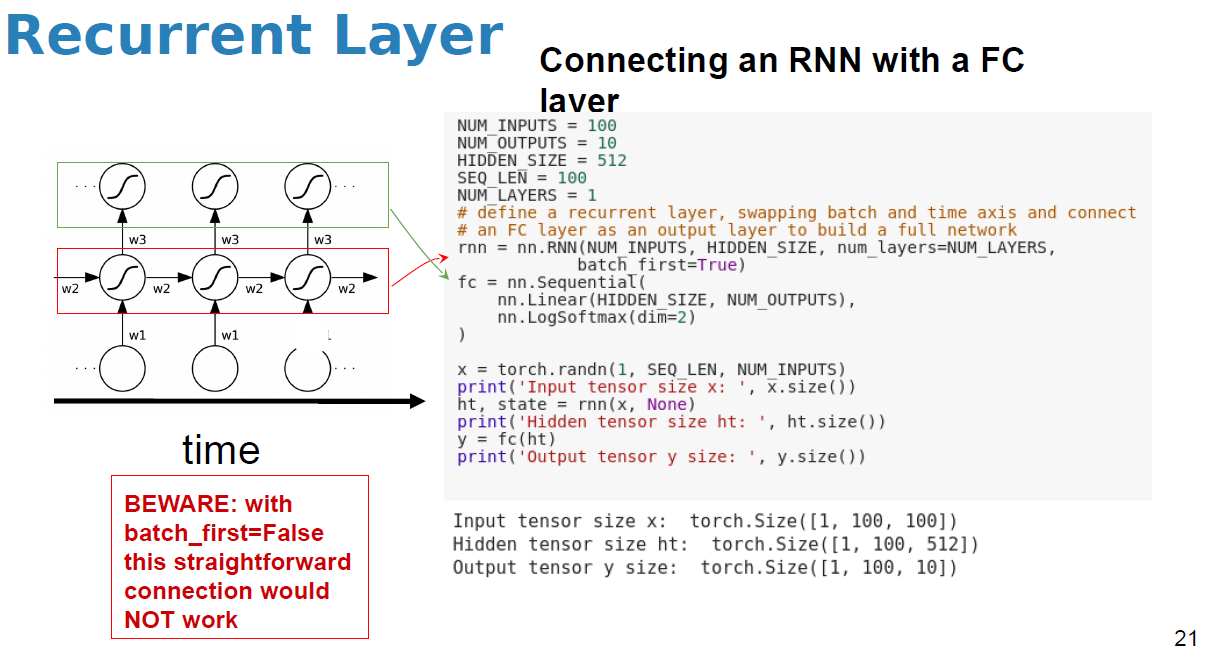

In [28]:
num_outputs=10

fc = nn.Sequential(
nn.Linear(hidden_size,num_outputs),
nn.LogSoftmax(dim=2)
)

x = torch.randn(5,seq_len,num_inputs)
ht, state = rnn(x,None)
y =fc(ht)
print(x.size(),ht.size(),y.size(),state.size())

torch.Size([5, 100, 100]) torch.Size([5, 100, 512]) torch.Size([5, 100, 10]) torch.Size([1, 5, 512])


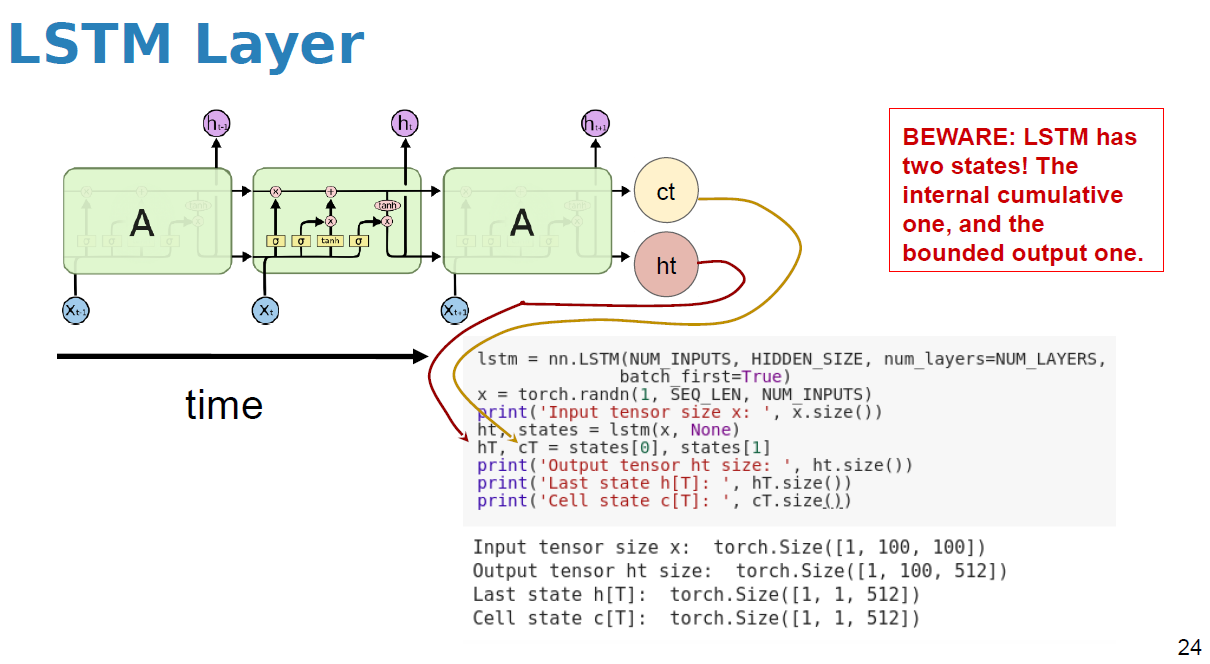

In [31]:
lstm = nn.LSTM(num_inputs,hidden_size,num_layers=num_layers,batch_first=True)
ht, state = lstm(x,None)
print(x.size(),ht.size(),state[0].size(),state[1].size())

torch.Size([5, 100, 100]) torch.Size([5, 100, 512]) torch.Size([1, 5, 512]) torch.Size([1, 5, 512])
